In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

“Probability theory is nothing more than common sense reduced to calculation. -1819”   
― Pierre Simon Laplace

Probabiity Distributions: Mathematical functions that we can use to model real-world processes.

Discrete distribution:
- Number of customer complaints
- Number of calls received in a call-center per hour
- Number of food trucks at Travis Park in a day

Continuous distribution:
- Height
- Temperature
- Employee salaries


### Types of Distributions:

- Uniform distribution
- Normal distribution
- Binomial distribution
- Poisson distrbution


More Probability distributions: https://en.wikipedia.org/wiki/List_of_probability_distributions
https://www.kdnuggets.com/2020/02/probability-distributions-data-science.html



### Lesson Objectives:
    
- Understand and recognize these distributions
- Understand parameters we need to generate these distribution
- Given a distribution, calculate probabilities for certain value of the random variable

### Uniform Distribution

Rolling a fair 6-sided die

- what does the Probability distribution looks like

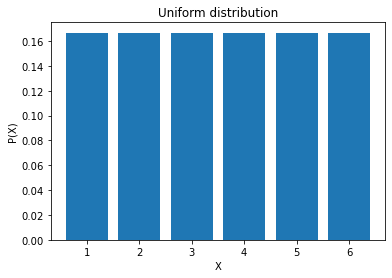

#### Working in Scipy stats module

In [2]:
# create a scipy object for underlying distribution

die_distribution = stats.randint(1,7)

die_distribution

#### scipy distribution object: What can we calculate from distribution?


- value -> probability  
   -- pmf: equal to a point (only for discrete distributions!)  
    -- pdf: equal to a point (for continuous distributions)  
   -- cdf: less than or equal to a point  
   -- sf: greater than a point  
- probability -> value  
   -- ppf: less than or equal to a point  
   -- isf: greater than a point  
- rvs for random values 

In [3]:
# What is probability of rolling 3?

die_distribution.pmf(3)

0.16666666666666666

In [4]:
# What is probability of rolling 3 or less?

die_distribution.cdf(3)

0.5

In [5]:
# What is the likelihood we roll a value higher than 4?

die_distribution.sf(4)

0.33333333333333337

In [6]:
# There is a 1/3 chance a dice roll will be higher than what value

die_distribution.isf(1/3)

4.0

### Normal Distribution

- Bell shaped
- Most observations are closer to the mean
- Common in nature. Examples
    - Height
    - time a flight takes from point A to B
    - manufacturing
- 2 parameters
    - mean ($\mu$)
    - std dev ($\sigma$)


#### Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars.
 - What is the probability that sales are 10,000 dollars on a certain day.     
 - What is the probability that sales are 10,000 dollars <ins>or less</ins> on a certain day.
 - What is the probability that sales are greater than 15,000 dollars on a certain day.
 - How much would the daily sales have to be to be in the top 10% of all days?

####  What is the probability that sales are 10,000 dollars on a certain day?



In [11]:
# Random variable?
# X = daily sales

# parameters defining the normal dist
mean = 12_000
std_dev = 2000


# Use Scripy Stats module to generte a dist:
sales = stats.norm(mean, std_dev)


# use apporpriate method to predict probability

sales.pdf(10000).round(5)

0.00012

#### What is the probability that sales are 10,000 dollars or less on a certain day.

In [13]:
# Use cdf to find probability for any given X or less.

sales.cdf(10000).round(3)

0.159

##### What is the probability that sales are greater than 15,000 dollars on a certain day?

In [14]:
# use sf to find probability for any given X or more.

sales.sf(15000)

0.06680720126885807

The survival function (sf) tells us what the probability of our random variable falling above a certain value is. This is the same as 1 minus the cdf of the same value.

#### How much would the daily sales have to be to be in the top 10% of all days?

In [15]:
# Given a probability what is the value of X?

sales.isf(0.1)

14563.103131089201

#### Manufacturing tolerances example:

#### Apple machines the front glass of iphone to mean thickness of 500 $\mu$m. Upon inspecting a sample of 1000 phone off assembly line, the standard deviation of the thickness was measured as 25 $\mu$m. 
#### Apple spec sheet list the max and min tolerances on glass thickness and +/- 50 $\mu$m. Meaning anything iphone built with glass thickness greater than 550 $\mu$m or less than 450 $\mu$m is considered defective.

1. If the assembly line produced 1000,000 iphone last year, how many iphone were built as 'defective'.

2. If the standard deviation of thickness increased to 33 $\mu$m due to manufacuring issue at the assembly plant, how many defective iphones were built?

3. Apple was able to implement new improved machining process and reduce the std dev to 14 $\mu$m. How many defective iphone will be built?

In [19]:
# If the assembly line produced 1000,000 iphone last year, how many iphone were
# built as 'defective'.

# paramaters
mean = 500
std_dev = 25

# distribution
phones = stats.norm(mean, std_dev)


(phones.sf(550) + phones.cdf(450)) * 1_000_000



45500.26389635839

In [21]:
# 2 If the standard deviation of thickness increased to 33 μm due to manufacuring issue at the assembly plant,
# how many defective iphones were built?

# paramaters
mean = 500
std_dev = 33

# distribution
phones = stats.norm(mean, std_dev)

(phones.sf(550) + phones.cdf(450)) * 1_000_000


129734.03829466889

In [22]:
# Apple was able to implement new improved machining process and reduce the std dev to 14 μm.
# How many defective iphone will be built?
# paramaters
mean = 500
std_dev = 14

# distribution
phones = stats.norm(mean, std_dev)

(phones.sf(550) + phones.cdf(450)) * 1_000_000

355.03938074694156

#### Real life examples of sigma levels:
https://www.biz-pi.com/real-life-sigma-level-examples/

#### Summary: Scipy provides many different ways of interacting with various statistical distributions through it's stats module.

- pmf / pdf
- cdf / ppf
- sf / isf


#### Mini Exercise:

The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour


1. What kind of probability distribution represents the random variable "battery life in hours"?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution


4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  


     a. What is the probability the cell phone battery more than 16 hours.  
     b. What is probability that cell phone battery lasts for exactly 12 hours.  
     c. What is the probability that cell phone battery lasts for 12 hours or less.  
     d. How many hours do the battery lasts for top 25% longest lasting phones.  

In [25]:
# Normal distribution

mean = 14
std_dev = 1.5

battery = stats.norm(mean, std_dev)

# 1.  What is the probability the cell phone battery more than 16 hours.  

battery.sf(16)

0.09121121972586788

In [26]:
# 2. What is probability that cell phone battery lasts for exactly 12 hours.  

battery.pdf(12)

0.10934004978399577

In [27]:
# What is the probability that cell phone battery lasts for 12 hours or less.  

battery.cdf(12)

0.09121121972586788

In [28]:
# How many hours do the battery lasts for top 25% longest lasting phones.  

battery.isf(0.25)

15.011734625294123

## Binomial Distribution 

 Binomial distribution is a <ins>discrete</ins> probability distribution.
 
 
Defined by 
 - Number of Trials (sequence of n trials)
 - Probability of 'success' in each trial



### Assumptions:
- Two potential outcome per trial
- Probability of success is same across all trials
- Each trial is independent

#### Example: Suppose we flip a fair coin 5 times in a row. What is probability of getting exactly 1 head.



##### Random variable X = Number of heads (success) from flipping a coin 5 times


 What is a trial.
- Each flip of coin is a trial
- number of trials = 5

Define what is 'success'.
- Getting 'heads' in a coin toss
- probability of success (getting 'heads') = 0.5 


Total possible outcomes for 5 coin flips = 2.2.2.2.2 = 32


-------------------------------
#### For P(X = 0)  i.e zero heads in 5 trials 
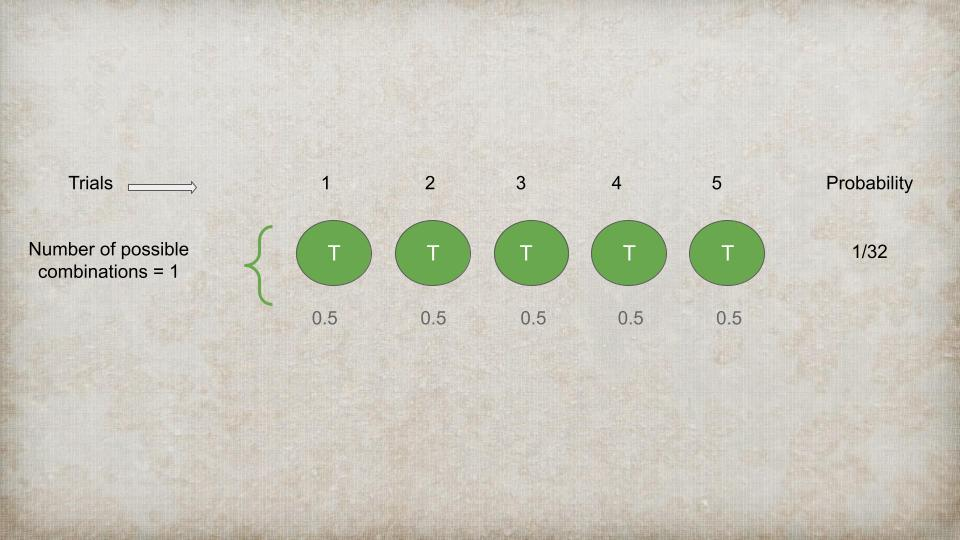

Probability(X = 0) = 1/32




- Probability (X = 1) i.e 1 head in 5 trials 

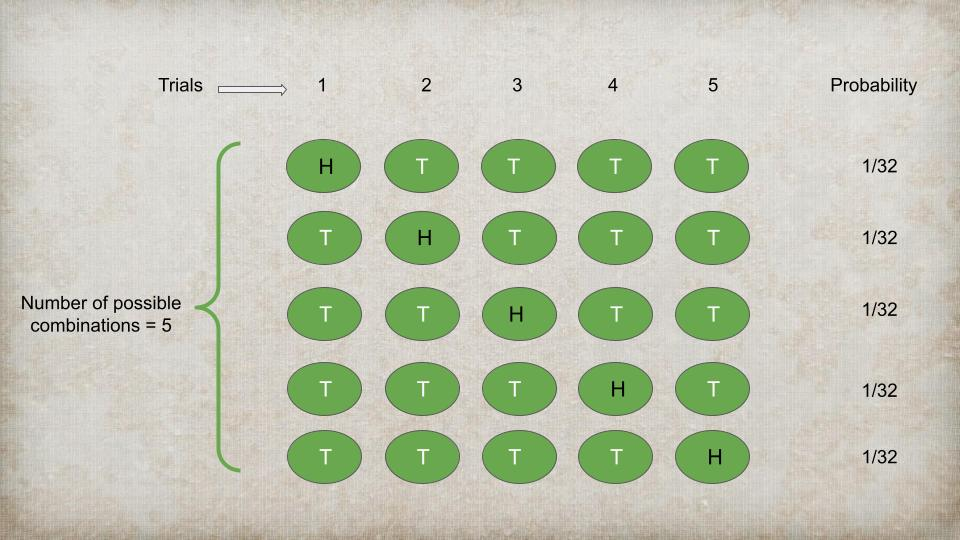


  Probability(X = 1) = 5 * 1/32

#### Using Scipy's stats module

In [29]:
# Binomial Parameters:
n_trials = 5
p =  0.5  # probability of success

flips = stats.binom(n_trials, p)

In [30]:
# prob of getting 0 heads 

flips.pmf(0)

0.03125

In [31]:
# prob of getting 2 heads 

flips.pmf(2)

0.3125

__________________________________________
#### Rigged coin distribution
- Probability of success (getting 'heads' in a coin toss) = 0.7  
- number of trials = 5

In [32]:
stats.binom(5, 0.7).pmf(5)

0.16806999999999994

___________________________________

#### Rigged coin distribution
Probability of success (getting heads in a coin toss) = 0.2  
Number of trials = 5

In [33]:
stats.binom(5, 0.2).pmf(5)

0.0003200000000000001

#### Example 1:  
You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [35]:
# What kind of distribution is this? 
# Binomial dist

#success = answering question correctly

n_trials = 30
p = 0.25

# Random variable X: # Number of questions answred correctly

stats.binom(n_trials, p).sf(10)

0.10572812269266013

#### Example 2
Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

success = someone showing up late to the class



In [38]:
# Random variable X?
# no. of people showing up late to the class

# What kind of distribution is this?
# Binomial dist

# What are the appropriate defining parameters for this distribution?
n_trials = 20
p = 0.05


stats.binom(n_trials, p).pmf(0)

0.3584859224085422

In [41]:
1 - stats.binom(n_trials,p).sf(0)

0.35848592240854193

#### Mini Exercise

The probability that a visitor will make a purchase when browsing in your web-store is 1.5%. You expect 350 web-visitors today 


1. What kind of probability distribution you have for "# number of visitors who end up making a purchase"?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution



4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  


     a. What is the probability that exactly 10 vistors will make the a purchase?
     b. What is probability 13 or more visitors will make a purchase?  
     c. What is probability that 10 or less visitors will make a purchase?

In [42]:
n_trials = 350
p = 0.015

stats.binom(n_trials, p)


In [43]:
# What is the probability that exactly 10 vistors will make the a purchase?
stats.binom(n_trials, p).pmf(10)

0.022583869648271287

In [44]:
# What is probability 13 or more visitors will make a purchase?
stats.binom(n_trials, p).sf(12)

0.0028028606293500156

In [45]:
# What is probability that 10 or less visitors will make a purchase?
stats.binom(n_trials, p).cdf(10)

0.9819938585504345

Text(0, 0.5, 'P(X)')

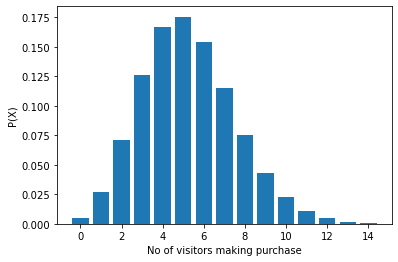

In [47]:
x = np.arange(0,15)
y = stats.binom(n_trials, p).pmf(x)

plt.bar(x,y)
plt.xlabel('No of visitors making purchase')
plt.ylabel('P(X)')

### Poisson Distribution

- discrete probability distribution 
- expresses the probability of a given number of events occurring in a fixed interval of time or space
- No upper bound on number of events (un-like Binomial distribution)
- Only one parameter ($\lambda$,) which is the rate at which the event happens.

#### Real life examples:

Telecommunications: # of calls arriving in to customer service.  

Astronomy: photons arriving at a telescope.

Biology: the number of mutations on a strand of DNA per unit length.  

Management: customers arriving at a counter or call centre.

Finance and insurance: number of losses or claims occurring in a given period of time.  

Radioactivity: number of decays in a given time interval in a radioactive sample.


#### Example
Suppose that astronomers estimate that large meteorites (above a certain size) hit the earth on average once every 100 years (λ = 1 event per 100 years), and that the number of meteorite hits follows a Poisson distribution.

What is the probability of k = 0 meteorite hits in the next 100 years?

In [49]:
# What kind of distribution is this?

λ = 1 # per 100 years

stats.poisson(λ).pmf(0)

0.36787944117144233

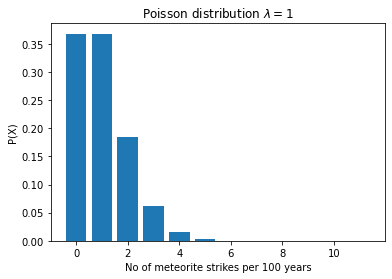

In [53]:
x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('No of meteorite strikes per 100 years')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 1$');

#### Mini Exercise:

Average number of customers going through CVS drive-through is 8 per hour. 

1. What kind of distribution we are working with?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution



4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the probability that 11 cars customers will go through in next hr.


In [56]:
λ = 8

stats.poisson(λ).pmf(11)

0.07219020642293475

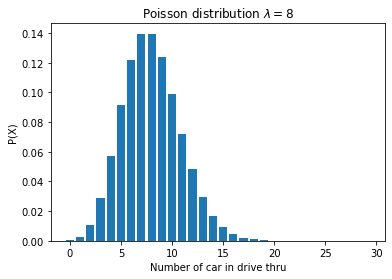

In [57]:
x = np.arange(0,30)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('Number of car in drive thru')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 8$');

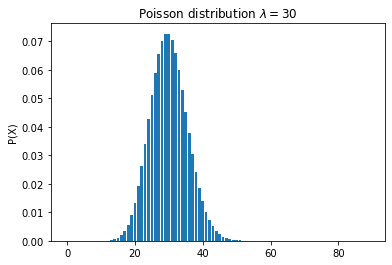

In [58]:
λ = 30

x = np.arange(0,90)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
# plt.xlabel(')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 30$');

## Summary:

Types of Distribution:
1. Normal distribution
    - mean($\mu$)
    - std dev ($\sigma$)
    - stats.norm($\mu$,  $\sigma$ )


2. Binomial distribution
    - number of trials (n)
    - probability of success (p)
    - stats.binom(n, p )
    - X = number of success in trials


3. Poisson distribution
    - rate ($\lambda$)
    - stats.poisson($\lambda$)
    - X = number of events per unit time
    
 
For a defined probability distribution above, we can answer different questions using following functions:

- pmf/pdf
- cdf/ppf
- sf/isf


### Bonus Material
### Relationship between Binomial, Normal and Poisson Distribution




Reference: https://www.youtube.com/watch?v=u9onO78hDlw